Running `GridSearchCV` below will take **some hours...** (it took me >2 hours using an Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz)

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_extended_wine():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
    features = data.columns[:-1]
    target = data.columns[-1]
    
    X = data[features].values
    y = data[target].values
    
    X_extended = X
    
    X_extended = MinMaxScaler().fit_transform(X_extended)
    X_extended = PolynomialFeatures(degree=5,include_bias=True).fit_transform(X_extended)
    
    return X, X_extended, y

X, X_extended, y = load_extended_wine()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_extended,
                                                    y, 
                                                    random_state=0)

In [4]:
param_grid = [
                {'kernel': ['rbf'], 
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
                },
                {'kernel': ['linear'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100]
                }
            ]

clf = GridSearchCV(
            estimator=SVC(), 
            param_grid=param_grid, 
            cv=5, 
            return_train_score=True,
            verbose=True,
            n_jobs=-1
    ).fit(X_train, y_train)

print(f'best score: { clf.best_score_}\n best params: {clf.best_params_}\n score over test: {clf.score(X_test, y_test)}\n\n Best estimator: {clf.best_estimator_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 133.2min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 148.4min finished


best score: 0.6191195388237039
 best params: {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
 score over test: 0.6179591836734694

 Best estimator: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [10]:
y_pred = clf.predict(X_test)
err = y_pred - y_test

Mean error 0.10122448979591837
Mean absolute error 0.45877551020408164


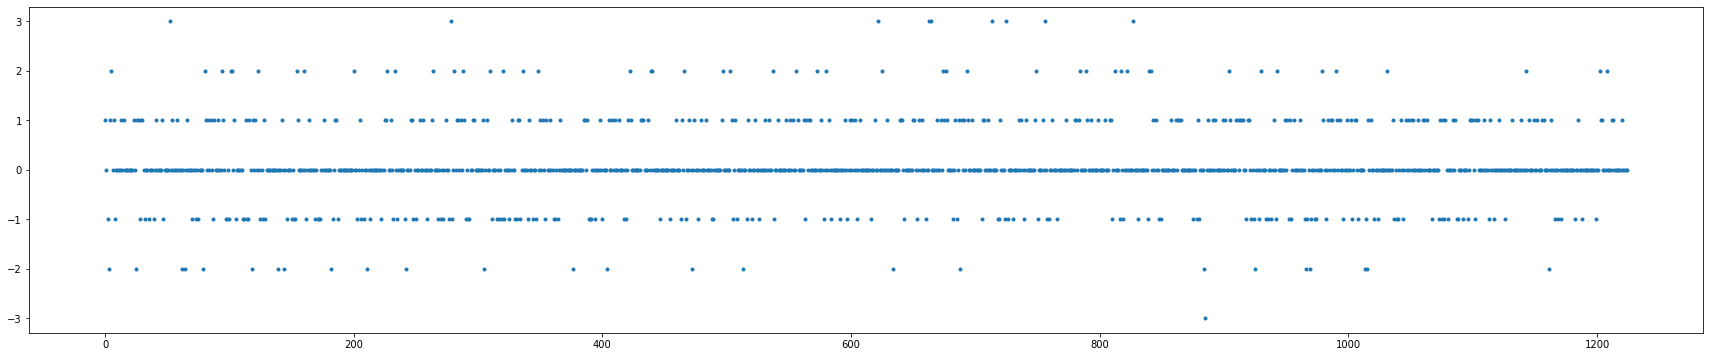

In [11]:
_ = plt.figure(figsize=(30,6))
plt.plot(err,".")

print("Mean error", err.mean())
print("Mean absolute error", np.absolute(err).mean())